In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

from matplotlib.colors import LogNorm
from sklearn import mixture

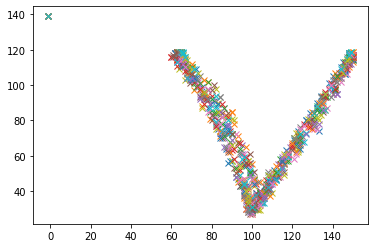

In [2]:
# plot all As into one plot
import glob
paths = glob.glob('Unistroke/A[0-9][0-9].txt') # regular expression
files = [loadtxt(f) for f in paths]

# file paths
files[0]

# plot As
for file in files:
    plt.plot(file[:,0],file[:,1],'x')
    
plt.show()

### 1. Estimate a bivariate GMM on the letter A data set and provide the estimated parameters.

We first use a concatenation of the A datasets for our Gaussian mixture model.

In [3]:
# concatenate As
data = np.concatenate(files)
data.size

# plot As
# plt.plot(data[:,0],data[:,1],'x')

gmm = mixture.GaussianMixture(n_components=2).fit(data)
labels = gmm.predict(data)
plt.scatter(data[:,0],data[:,1], c=labels)

The weights and means of the model are:

In [4]:
# print weights
gmm = mixture.GaussianMixture(n_components=2).fit(data)
weights = np.round(gmm.weights_,2)
mean = np.round(gmm.means_,2)

print(weights, ',\n', mean)

[0.49 0.51] ,
 [[ 71.1   92.73]
 [122.54  69.23]]


We now use the merged and normalised dataset *Amerged* for the Gaussian mixture model.

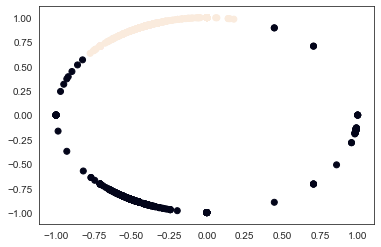

In [117]:
# amerge 
amerge = loadtxt("Unistroke/Amerge.txt", delimiter=" ")

gmm_amerge = mixture.GaussianMixture(n_components=2).fit(amerge)
labels = gmm_amerge.predict(amerge)
plt.scatter(amerge[:,0],amerge[:,1], c=labels)

The weights and means of the model are:


In [306]:
# print
print('Weights: \n', gmm_amerge.weights_, ',\n\n',
      'Means: \n', gmm_amerge.means_, ',\n\n', 
      'Covariances: \n', gmm_amerge.covariances_)

Weights: 
 [0.55315456 0.44684544] ,

 Means: 
 [[-0.20488739  0.76291047]
 [-0.48162122 -0.83800013]] ,

 Covariances: 
 [[[ 0.23341245 -0.13776303]
  [-0.13776303  0.14257831]]

 [[ 0.03313364 -0.0266468 ]
  [-0.0266468   0.03266514]]]


Answer to Question 1: [0.5 0.5]

### 2. Label the data using the estimated model and show the pdf of the estimated GMM.
One figure with the data labeled in color overlapping on the contours of the log(pdf)

*__Question:__ inline labels = legend?*

Example from Github: https://github.com/scikit-learn/scikit-learn/blob/master/examples/mixture/plot_gmm_pdf.py

Helper function for plotting.

In [391]:
def plot_data(values, labels):
    # meshgrid
    x = np.linspace(-1.5,1.5)
    y = np.linspace(-1.5,1.5)
    X, Y = np.meshgrid(x,y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm_amerge.score_samples(XX)
    Z = Z.reshape(X.shape)

    # plot contour
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 3, 10))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    plt.scatter(amerge[:, 0], amerge[:, 1],.8, c=labels)
    plt.title('Negative log-likelihood predicted by a GMM')
    plt.axis('tight')
    plt.show()

Now plot the log pdf:

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


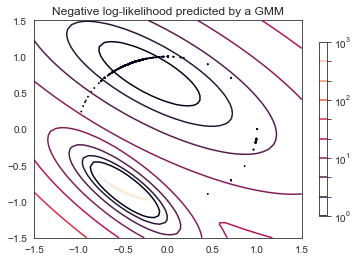

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


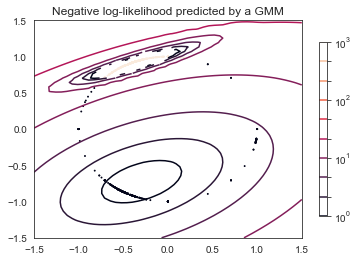

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


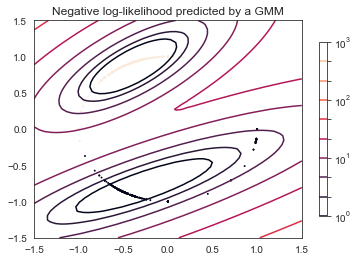

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


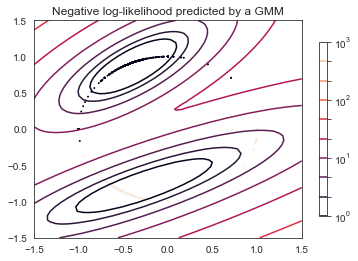

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


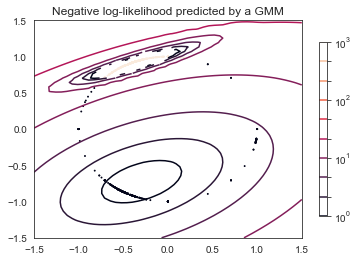

In [394]:
# amerge data
amerge = loadtxt("Unistroke/Amerge.txt", delimiter=" ")

trials = 5 # tests

for k in range(1,trials+1):
    # fit new GMM
    gmm_amerge = mixture.GaussianMixture(n_components=2).fit(amerge)
    labels = gmm_amerge.predict(amerge)
    # plot
    plot_data(amerge, labels)

Observation: Due to the outliers we have very different log(pdf) curves!

### 3. To validate the assumption of bivariate Gaussian mixture:
- Plot each marginal histogram (inxandy) and add the estimated mixture of univariateGaussian pdfs to the figure.
- For each marginal, provide separate histograms of each cluster and add the estimatedunivariate Gaussian pdf to the figure.

**Note:** I didn't use `scipy.stats.norm`

Define helper functions for plotting.

In [424]:
def plot_hist_2Clusters(values, labels):
    # plot parameters (bins)
    kwargs = dict(alpha=0.5, linewidth=2,bins=100)
    
    # histograms
    plt.hist(values[labels == 0], **kwargs, color='dodgerblue', label = 'cluster1')
    plt.hist(values[labels == 1], **kwargs, color='deeppink', label = 'cluster1')

    # specifications
    plt.gca().set(title='Histogram of two clusters distributions')
    plt.gca().axes.set_ylim([0,70])
    plt.legend()
    plt.show()
    
def plot_density_2Clusters(values, labels):
    # plot parameters (bins)
    kwargs = dict(alpha=0.5, linewidth=2,bins=100)
    
    # specifications
    plt.gca().set(title='Histogram of two clusters density')
    plt.gca().axes.set_ylim([0,70])
    
    # pdfs
    sns.kdeplot(values)
    plt.show()
    
def plot_both_2Clusters(values, labels):
    # histograms + pdfs
    plt.hist(values[labels == 0], **kwargs, color='dodgerblue', label = 'cluster1')
    plt.hist(values[labels == 1], **kwargs, color='deeppink', label = 'cluster1')
    plt.gca().set(title='Histogram of two clusters')
    plt.gca().axes.set_ylim([0,70])
    sns.kdeplot(values)
    plt.legend()

### a) Plot x and y in 1D and add the univariate Gaussian pdfs

To get the 1D pdfs of the two distributions we fit the model again.

In [257]:
import seaborn as sns

# prepare data
x = amerge[:,0] # x coordinates
y = amerge[:,1] # y coordinates

nr_lables = np.unique(labels).size

# plot clusters singularly
for k in range(nr_labels):
    sns.jointplot(x[labels == k], y[labels == k], kind='scatter', xlim=[-1.2,1.2], ylim=[-1.2,1.2])

In [126]:
# plot both in one plot
sns.jointplot(x,y,kind='reg',scatter=False)
sns.scatterplot(x,y,hue=labels)

# TODO - did not quite work out as planned - no colours in side plots

We want just the outer plots.

Example: https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

**Marginal in x**

Two distributions plus density functions.

In [427]:
# plot histograms
#plot_hist_2Clusters(x, labels)

In [428]:
# plot density function
#plot_density_2Clusters(x, labels)

In [420]:
# plot both histogram and density
plot_both_2Clusters(x,labels)

* *Observation: Numbers go till 80, in seaborn plot (below) only until 5?*
* *Observation: Blue is smaller than pink*

Add a kernel density curve (non-parametric) with seaborn.

**Note:** I don't think that is what we want.

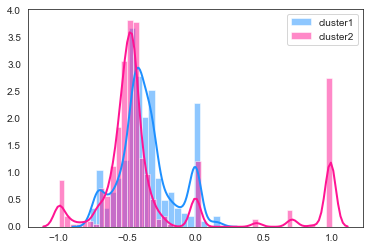

In [184]:
# style (bar frame)
sns.set_style('white')

# plot parameters
kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':2})

# sns distplot
sns.distplot(x1, color='dodgerblue', label='cluster1', **kwargs,norm_hist=True)
sns.distplot(x2, color='deeppink', label='cluster2', **kwargs,norm_hist=True)
plt.legend();

Plot and add Gaussian densitiy function.

**Marginal in y**

(same as above)

In [307]:
# plot histograms
#plot_hist_2Clusters(y[labels == 0],y[labels == 1])

In [308]:
# plot density function
#plot_density_2Clusters(y[labels == 0],y[labels == 1])

In [273]:
# plot both histograms and density
plot_both_2Clusters(y[labels == 0],y[labels == 1])

The seaborn inbuilt density kernel function:

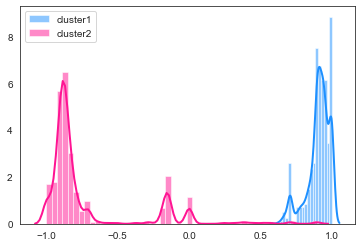

In [212]:
# style (bar frame)
sns.set_style('white')

# plot parameters
kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':2})

# sns distplot
sns.distplot(y1, color='dodgerblue', label='cluster1', **kwargs,norm_hist=True)
sns.distplot(y2, color='deeppink', label='cluster2', **kwargs,norm_hist=True)
plt.legend();

### b) Plot x and y and the Gaussian mixture model function

Define some helper functions for plotting. These are almost the same as above only that we plot only one distribution.

In [408]:
def plot_hist(values):
    # plot parameters (bins)
    kwargs = dict(alpha=0.5, linewidth=2,bins=100)
    
    # histograms
    plt.hist(values, **kwargs, color='dodgerblue', label = 'cluster1')

    # specifications
    plt.gca().set(title='Histogram of one clusters distribution')
    plt.gca().axes.set_ylim([0,70])
    plt.legend()
    plt.show()
    
def plot_density(values):
    # plot parameters (bins)
    kwargs = dict(alpha=0.5, linewidth=2,bins=100)
    
    # specifications
    plt.gca().set(title='Histogram of one clusters pdf')
    plt.gca().axes.set_ylim([0,70])
    
    # density function
    sns.kdeplot(values)
    
    plt.show()
    
def plot_both(values):
    # histograms + pdfs
    plt.hist(values, **kwargs, color='dodgerblue')
    plt.gca().set(title='Histogram of one cluster plus density')
    plt.gca().axes.set_ylim([0,70])
    sns.kdeplot(values)
    plt.show()

Load data:

In [383]:
# amerge data
amerge = loadtxt("Unistroke/Amerge.txt", delimiter=" ")

# prepare data
x = amerge[:,0] # x coordinates
y = amerge[:,1] # y coordinates

# GMM (again)
gmm_amerge = mixture.GaussianMixture(n_components=2).fit(amerge)
labels = gmm_amerge.predict(amerge).astype(int)

#### Marginal in x (for k clusters)

Histograms:

In [285]:
# histograms
#for k in range(0,nr_labels):
#    plot_hist(x[labels == k])

Density functions:

In [286]:
# densities
#for k in range(0,nr_labels):
#    plot_density(x[labels == k])

Both together:

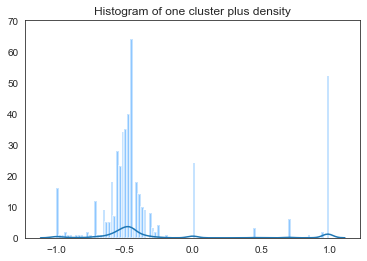

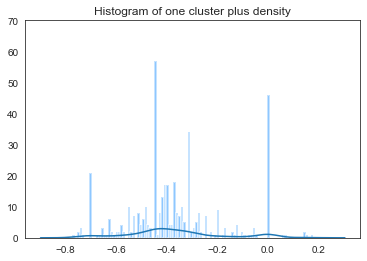

In [411]:
# densities
for k in range(0,nr_labels):
    plot_both(x[labels == k])

#### Marginal in y (for k clusters)

Histograms:

In [404]:
# histograms
#for k in range(0,nr_labels):
#    plot_hist(y[labels == k])

Density functions:

In [410]:
# densities
#for k in range(0,nr_labels):
#    plot_density(y[labels == k])

Both together:

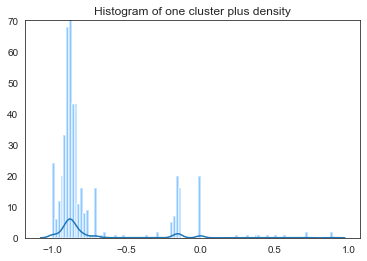

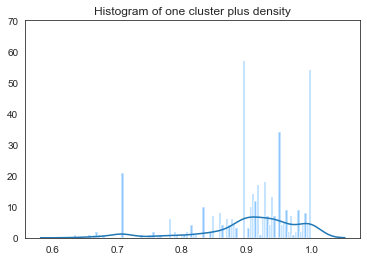

In [413]:
for k in range(0,nr_labels):
    plot_both(y[labels == k])

### 4. Comment the results of questions 3 (a) and (b). What to think about the bivariate Gaussianmixture assumption? Why?

After 2. the outlier change the distribution quite a lot. In 3 (a) and (b) ... [TODO]

### 5. Plot each data point $x_i$ with some colourmap corresponding to $P(Z_i= 1\vert X_i)$ (you may plot $logP(Z_i= 1|X_i)$ instead). How to interpret that plot?

In [414]:
# TODO - each point with one colour map? If it belongs to cluster 1???

Interpretation: